In [21]:
import pandas as pd 
import csv
from datetime import date
import matplotlib.pyplot as plt 
import seaborn as sb 

df = pd.read_csv('/Users/nasif/Desktop/datasets/global temp/GlobalLandTemperaturesByState.csv')

df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [23]:
df.max()

dt                                  2013-09-01
AverageTemperature                      36.339
AverageTemperatureUncertainty           12.646
State                                 Zhejiang
Country                          United States
dtype: object

In [24]:
#Which country has the highest average temperature?

df.loc[df['AverageTemperature'] == df['AverageTemperature'].max()]

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
116037,2012-06-01,36.339,0.385,Delhi,India


In [25]:
'''Which country has the maxiumum std deviation in temperature?
also find out the coefficient of variance'''

maxstd = pd.DataFrame(df.groupby('Country').agg({'AverageTemperature':['std','mean']}))

#resetting index
maxstd = maxstd.reset_index()

#Now we know that CoVariance = std Dev/mean, we do this for each country
maxstd['CoV'] = (maxstd[('AverageTemperature','std')]/maxstd[('AverageTemperature','mean')])*100

#finding store with max std dev
maxstd.loc[maxstd[('AverageTemperature','std')] ==maxstd[('AverageTemperature','std')].max()]

Country AverageTemperature                   CoV
                         std      mean            
2  Canada          13.188161 -1.321079 -998.287381

In [32]:
monthly = df.groupby(pd.groupby(key='Date', freq=1)).sum()
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['dt']
Y = monthly['AverageTemperature']
plt.plot(X,Y)
plt.title('Monthly Temperatures')
plt.xlabel('Monthly')
plt.ylabel('AverageTemperature')

AttributeError: module 'pandas' has no attribute 'groupby'

Text(0, 0.5, 'Average Temperature')

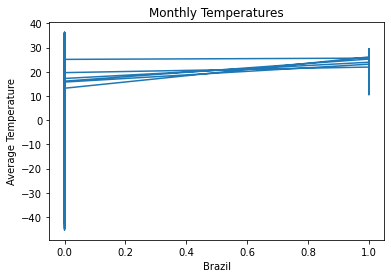

In [45]:
X = df['Country'] == 'Brazil'
Y = df['AverageTemperature']
plt.plot(X,Y)
plt.title('Monthly Temperatures')
plt.xlabel('Brazil')
plt.ylabel('Average Temperature')

In [ ]:
names = df['Country']
temp = df['AverageTemperature']

plt.bar(names, temp)